In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
folder_number = '001'
main_dir = f'Geolife Trajectories 1.3/Data/{folder_number}/Trajectory/'

In [3]:
some_file = os.listdir(main_dir)[0]

In [4]:
some_file

'20081023055305.plt'

In [5]:
sample = np.genfromtxt(main_dir+some_file,
                       skip_header=6, delimiter=',', dtype=None, encoding=None)

In [6]:
sample

array([(39.984094, 116.319236, 0, 492, 39744.24519676, '2008-10-23', '05:53:05'),
       (39.984198, 116.319322, 0, 492, 39744.24520833, '2008-10-23', '05:53:06'),
       (39.984224, 116.319402, 0, 492, 39744.2452662 , '2008-10-23', '05:53:11'),
       (39.984211, 116.319389, 0, 492, 39744.24532407, '2008-10-23', '05:53:16'),
       (39.984217, 116.319422, 0, 491, 39744.24538194, '2008-10-23', '05:53:21'),
       (39.98471 , 116.319865, 0, 320, 39744.24540509, '2008-10-23', '05:53:23'),
       (39.984674, 116.31981 , 0, 325, 39744.24546296, '2008-10-23', '05:53:28'),
       (39.984623, 116.319773, 0, 326, 39744.24552083, '2008-10-23', '05:53:33'),
       (39.984606, 116.319732, 0, 327, 39744.2455787 , '2008-10-23', '05:53:38'),
       (39.984555, 116.319728, 0, 324, 39744.24563657, '2008-10-23', '05:53:43'),
       (39.984579, 116.319769, 0, 309, 39744.24569444, '2008-10-23', '05:53:48'),
       (39.984579, 116.319769, 0, 309, 39744.24572917, '2008-10-23', '05:53:51'),
       (39.98457

In [7]:
import datetime

noon = datetime.datetime(2022, 5, 13, 12, 0, 0)
dinner = datetime.datetime(2022, 5, 13, 18, 0, 0)

def trajectories_in_timespan(sample, start, end):
    trajectory_list = []
    for trajectory in sample:
        date = trajectory[5]
        date_split = date.split('-')
        time = trajectory[6]
        time_split = time.split(':')
        trajectory_time = datetime.datetime(int(date_split[0]), int(date_split[1]), int(date_split[2]), int(time_split[0]), int(time_split[1]), int(time_split[2]))
        if trajectory_time.time() >= start.time() and trajectory_time.time() < end.time():
            trajectory_list.append(trajectory)
    return np.asarray(trajectory_list)

trajectory_sample = trajectories_in_timespan(sample, noon, dinner)
print(trajectory_sample)

[(40.013814, 116.306531, 0, 85, 39744.50003472, '2008-10-23', '12:00:03')
 (40.013814, 116.306531, 0, 85, 39744.50009259, '2008-10-23', '12:00:08')
 (40.013814, 116.306531, 0, 85, 39744.50015046, '2008-10-23', '12:00:13')
 (40.013813, 116.306531, 0, 85, 39744.50020833, '2008-10-23', '12:00:18')
 (40.013813, 116.306531, 0, 85, 39744.5002662 , '2008-10-23', '12:00:23')
 (40.013812, 116.306531, 0, 85, 39744.50032407, '2008-10-23', '12:00:28')
 (40.013812, 116.306531, 0, 86, 39744.50038194, '2008-10-23', '12:00:33')
 (40.013812, 116.30653 , 0, 86, 39744.50043981, '2008-10-23', '12:00:38')
 (40.013811, 116.306531, 0, 86, 39744.50049769, '2008-10-23', '12:00:43')
 (40.013811, 116.30653 , 0, 86, 39744.50055556, '2008-10-23', '12:00:48')
 (40.01381 , 116.306531, 0, 86, 39744.50061343, '2008-10-23', '12:00:53')
 (40.01381 , 116.306531, 0, 86, 39744.5006713 , '2008-10-23', '12:00:58')
 (40.013809, 116.306531, 0, 86, 39744.50072917, '2008-10-23', '12:01:03')
 (40.013809, 116.306532, 0, 86, 39744.

In [8]:
df = pd.DataFrame(data=sample)
df = df.rename(columns={"f0": "Latitude", "f1": "Longitude", "f2": "0", "f3": "Altitude", "f4": "Date (Days since 12/30/1899)","f5": "Date", "f6": "Time"})
df_coordinates = df[['Latitude', 'Longitude']]

BBox = ((df_coordinates.iloc[:,1].min(),   df_coordinates.iloc[:,1].max(),      
         df_coordinates.iloc[:,0].min(), df_coordinates.iloc[:,0].max()))
BBox = ((116.3047, 116.3407, 39.9705, 40.0175))
# Smallest values for latitude and longitude

beijing_map = plt.imread(f'map001.png')

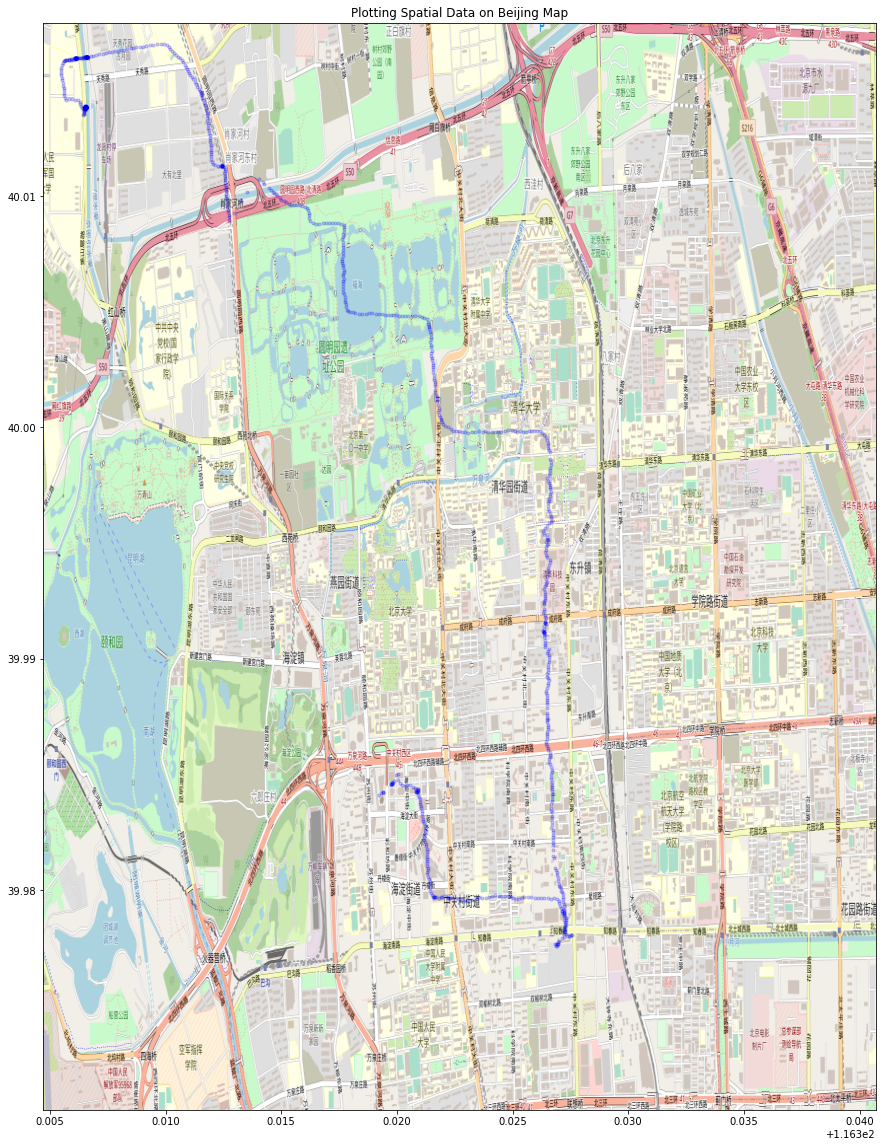

In [9]:
# Create map with data points
fig, ax = plt.subplots(figsize=(30,20))
ax.scatter(df.Longitude, df.Latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Beijing Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(beijing_map, extent = BBox)

In [10]:
trajectory_sample

array([(40.013814, 116.306531, 0, 85, 39744.50003472, '2008-10-23', '12:00:03'),
       (40.013814, 116.306531, 0, 85, 39744.50009259, '2008-10-23', '12:00:08'),
       (40.013814, 116.306531, 0, 85, 39744.50015046, '2008-10-23', '12:00:13'),
       (40.013813, 116.306531, 0, 85, 39744.50020833, '2008-10-23', '12:00:18'),
       (40.013813, 116.306531, 0, 85, 39744.5002662 , '2008-10-23', '12:00:23'),
       (40.013812, 116.306531, 0, 85, 39744.50032407, '2008-10-23', '12:00:28'),
       (40.013812, 116.306531, 0, 86, 39744.50038194, '2008-10-23', '12:00:33'),
       (40.013812, 116.30653 , 0, 86, 39744.50043981, '2008-10-23', '12:00:38'),
       (40.013811, 116.306531, 0, 86, 39744.50049769, '2008-10-23', '12:00:43'),
       (40.013811, 116.30653 , 0, 86, 39744.50055556, '2008-10-23', '12:00:48'),
       (40.01381 , 116.306531, 0, 86, 39744.50061343, '2008-10-23', '12:00:53'),
       (40.01381 , 116.306531, 0, 86, 39744.5006713 , '2008-10-23', '12:00:58'),
       (40.013809, 116.30653

In [16]:
from gtda.mapper import make_mapper_pipeline, MapperInteractivePlotter
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [28]:
data = df[['Latitude', 'Longitude']]

In [32]:
data

,Latitude,Longitude
0,39.984094,116.319236
1,39.984198,116.319322
2,39.984224,116.319402
3,39.984211,116.319389
4,39.984217,116.319422
...,...,...
956,40.013804,116.306532
957,40.013803,116.306532
958,40.013803,116.306532
959,40.013803,116.306532


In [29]:
pipe = make_mapper_pipeline(filter_func=PCA(), clusterer=DBSCAN())
plotter = MapperInteractivePlotter(pipe, data)
plotter.plot()